<a href="https://colab.research.google.com/github/LeoMx11/Cell-Death-Prediction/blob/main/Cell_Death_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cell Death Prediction

## Collecting Graph Data

To utilize a graph in pytorch geometric GNN models, we need to construct the graph so that the model can read it. To do this, I will make a function that will expedite the process of manually entering which cells are neighbors of one another. There may be a way to automate this, but not one that I have found. So here goes...

In [2]:
import torch

In [6]:
def return_graph():

  cur = 1

  bigList = []

  while True:

    user_str = input(f"Please enter all cell numbers touching cell #{cur}, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.")
    user_list = user_str.split(',')

    if user_str == 'done':
      break

    for i in range(len(user_list)):
      if [cur, int(user_list[i])] not in bigList:
        bigList.append([cur, int(user_list[i])])
        bigList.append([int(user_list[i]), cur])

    cur += 1

  return torch.tensor(bigList, dtype=torch.long).t().contiguous()

In [8]:
data = return_graph()

Please enter all cell numbers touching cell #1, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.2,8,9
Please enter all cell numbers touching cell #2, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.3,8,9,10
Please enter all cell numbers touching cell #3, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.4,10,11,12
Please enter all cell numbers touching cell #4, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.5,11,12
Please enter all cell numbers touching cell #5, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.6,12,13
Please enter all cell numbers touching cell #6, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.7,8,9,14
Please enter all cell numbers touching cell #7, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.8,14,15
Please enter all cell numbers touching cell #8, separated only by commas (i.e. '2,14,23,45'). Else if

In [9]:
# Visualize the graph
import networkx as nx
import matplotlib.pyplot as plt

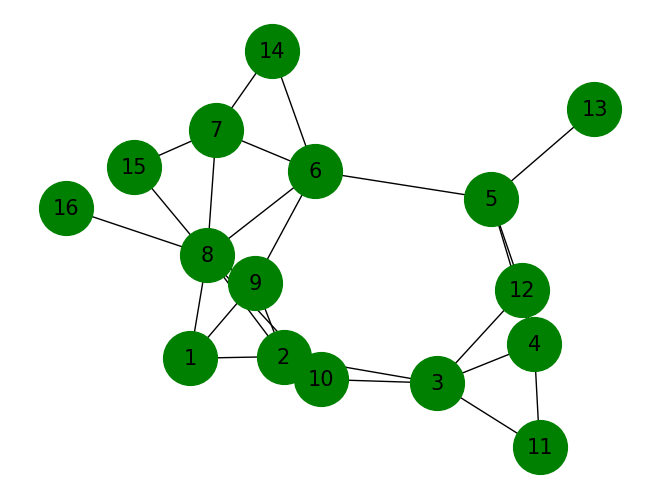

In [33]:
graph = nx.Graph()

done_list = []

for i in range(len(data[0])):
  if [int(data[0][i]), int(data[1][i])] not in done_list:
    graph.add_edge(int(data[0][i]), int(data[1][i]))
    done_list.append([int(data[0][i]), int(data[1][i])])



# Draw the graph
nx.draw(graph, with_labels=True, node_color="green", node_size=1500, font_size=15)

Now we must add the functionality of inputting dead nodes

In [42]:
def get_dead_node_list():

  user_str = input("Please enter all dead cells, separated only by commas (i.e. '2,14,23,45').")
  user_list = user_str.split(',')

  for i in range(len(user_list)):
    user_list[i] = int(user_list[i])

  return user_list

In [43]:
dead_list = get_dead_node_list()

Please enter all dead cells, separated only by commas (i.e. '2,14,23,45').13,7,9,4


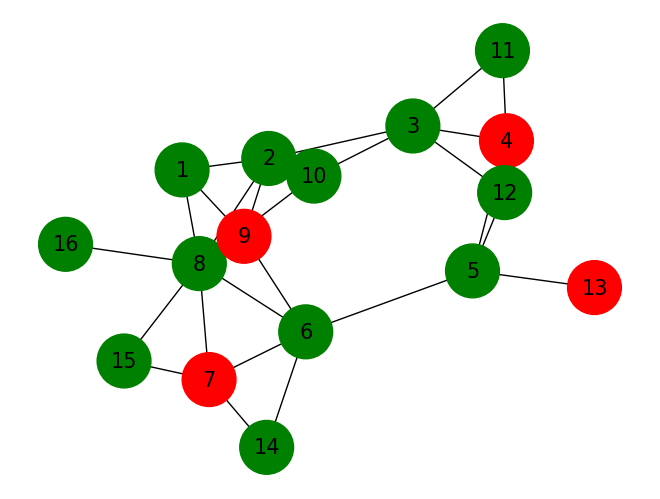

In [44]:
# Draw graph with dead cells highlighted

nx.draw(graph, with_labels=True, node_color=["red" if x in dead_list else "green" for x in graph.nodes], node_size=1500, font_size=15)